In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm

%matplotlib inline 

In [36]:
df = pd.read_csv('data1.csv')
df = df.sort_values('x')
df.head()

,x,y
73,0.006248,17.329551
142,0.104671,15.268703
34,0.246137,15.394678
17,0.420595,12.743181
5,0.455565,15.480800


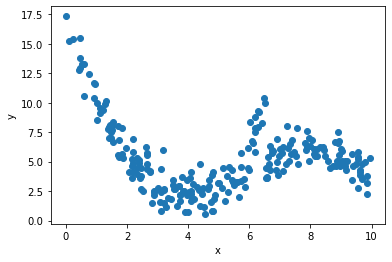

In [37]:
plt.scatter(df.x, df.y);
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Cubic polynomial least-squares regression of y on x

In [52]:
### edTest(test_ols_formula) ###
def fit_model(formula):
    return sm.ols(formula=formula, data=df).fit()

#formula = _____
formula = 'y ~ np.power(x, 3)'
fit2_lm = fit_model(formula)

In [53]:
### edTest(test_predictions_summary) ###
#Get the predictions and the summary dataframe
#poly_predictions = fit2_lm._____()_____()
poly_predictions = fit2_lm.get_prediction(df).summary_frame()
poly_predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,5.281944,0.245670,4.798078,5.765810,-0.485245,11.049134
1,5.281944,0.245670,4.798079,5.765809,-0.485246,11.049133
2,5.281939,0.245664,4.798086,5.765792,-0.485250,11.049127
3,5.281917,0.245638,4.798114,5.765719,-0.485268,11.049101
4,5.281909,0.245629,4.798124,5.765694,-0.485274,11.049092
...,...,...,...,...,...,...
245,4.930111,0.494547,3.956063,5.904159,-0.898707,10.758929
246,4.925352,0.502349,3.935939,5.914766,-0.906053,10.756758
247,4.924550,0.503666,3.932541,5.916559,-0.907296,10.756396
248,4.923805,0.504890,3.929386,5.918224,-0.908452,10.756062


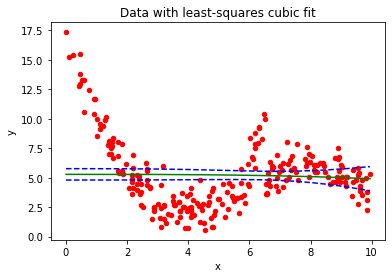

In [54]:
ax2 = df.plot.scatter(x='x',y='y',c='Red',title="Data with least-squares cubic fit")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

# CI for the predection at each x value, i.e. the curve itself
ax2.plot(df.x, poly_predictions['mean'],color="green")
ax2.plot(df.x, poly_predictions['mean_ci_lower'], color="blue",linestyle="dashed")
ax2.plot(df.x, poly_predictions['mean_ci_upper'], color="blue",linestyle="dashed");
